In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.1 MB/s eta 0:00:00


In [ ]:
# @title Default title text
!pip install imblearn

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Path to dataset files: /kaggle/input/unsw-nb15


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [ ]:
ls /kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv

/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv


In [ ]:
ls /kaggle/input/network-intrusion-dataset

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
import pandas as pd

# Load the official training split/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/UNSW_NB15_training-set.csv
unsw_df = pd.read_csv(r"/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv")

print("Columns:", list(unsw_df.columns)[:20])
print("Shape:", unsw_df.shape)

Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit']
Shape: (82332, 45)


In [ ]:
unsw = unsw_df[['dur', 'proto', 'service', 'state',
                'spkts', 'dpkts', 'sbytes', 'dbytes',
                'rate', 'sttl', 'dttl', 'sload', 'dload',
                'sinpkt', 'dinpkt', 'sjit', 'djit',
                'attack_cat', 'label']].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode protocol, service, state, attack_cat
for col in ['proto', 'service', 'state', 'attack_cat']:
    unsw[col] = LabelEncoder().fit_transform(unsw[col].astype(str))

# Normalize numeric columns (optional for neural models)
num_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
            'rate', 'sttl', 'dttl', 'sload', 'dload',
            'sinpkt', 'dinpkt', 'sjit', 'djit']
unsw[num_cols] = unsw[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
import pandas as pd
import glob

path = r"/kaggle/input/network-intrusion-dataset"
all_files = glob.glob(path + "/*.csv")

cic_dfs = []
for f in all_files:
    df = pd.read_csv(f)
    cic_dfs.append(df)

cic = pd.concat(cic_dfs, ignore_index=True)
print(cic.shape)

(2830743, 79)


In [ ]:
cic.columns
# Typical relevant features:
# ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#  'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Protocol', 'Label']


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Strip spaces from columns
cic.columns = cic.columns.str.strip()

# Columns to keep
keep_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
             'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
             'Label']

# Keep only required columns
combined = cic[keep_cols].copy()

# Rename columns to match UNSW style (optional)
combined.rename(columns={
    'Flow Duration':'dur',
    'Total Fwd Packets':'spkts',
    'Total Backward Packets':'dpkts',
    'Total Length of Fwd Packets':'sbytes',
    'Total Length of Bwd Packets':'dbytes',
    'Protocol':'proto',
    'Label':'attack_cat'
}, inplace=True)


In [ ]:
# Attack label encoding (0=normal, 1=attack)
combined['attack_cat'] = combined['attack_cat'].apply(lambda x: 0 if str(x).lower()=='benign' else 1)

# Normalize numeric features
num_cols = ['dur','spkts','dpkts','sbytes','dbytes']
combined[num_cols] = combined[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
# Example columns after preprocessing
# ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']

unsw_cols = unsw_df.columns.tolist()
cic_cols = combined.columns.tolist()

print("UNSW columns:", unsw_cols)
print("CIC columns:", cic_cols)

UNSW columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
CIC columns: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']


In [ ]:
common_cols = ['dur','spkts','dpkts','sbytes','dbytes','attack_cat']

In [ ]:
unsw_common = unsw_df[common_cols].copy()
cic_common = combined[common_cols].copy()

In [ ]:
import pandas as pd

combined_df = pd.concat([unsw_common, cic_common], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)

Combined dataset shape: (2913075, 6)


In [ ]:
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print(combined_df['attack_cat'].value_counts())

attack_cat
0                 2273097
1                  557646
Normal              37000
Generic             18871
Exploits            11132
Fuzzers              6062
DoS                  4089
Reconnaissance       3496
Analysis              677
Backdoor              583
Shellcode             378
Worms                  44
Name: count, dtype: int64


In [ ]:
import pandas as pd

df = combined_df.copy()

# Keep original attack_cat for reference
df['orig_attack_cat'] = df['attack_cat']

# Function to convert mixed labels to binary
def to_binary_label(x):
    if pd.isna(x):
        return 1  # treat unknown as attack
    s = str(x).strip().lower()
    if s in ('0', 'normal', 'benign'):
        return 0
    else:
        return 1

# Create binary label column
df['label'] = df['attack_cat'].apply(to_binary_label)

# Verify
print("Binary label distribution:")
print(df['label'].value_counts())

Binary label distribution:
label
0    2310097
1     602978
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separate features and target from the original combined dataset
X = combined_df[['dur','spkts','dpkts','sbytes','dbytes']].values
y = df['label'].values # Use the 'label' column with binary labels

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Create a new DataFrame with undersampled data
df_undersampled = pd.DataFrame(X_undersampled, columns=['dur','spkts','dpkts','sbytes','dbytes'])
df_undersampled['label'] = y_undersampled # Use 'label' to be consistent with previous steps

print("Shape of original combined data:", combined_df.shape)
print("Shape of undersampled data:", df_undersampled.shape)
print("Label distribution in undersampled data:")
print(df_undersampled['label'].value_counts())

Shape of original combined data: (2913075, 6)
Shape of undersampled data: (1205956, 6)
Label distribution in undersampled data:
label
0    602978
1    602978
Name: count, dtype: int64


In [ ]:
import networkx as nx
import numpy as np

# ✅ Sample smaller subset (still configurable)
df_to_use = df_undersampled.sample(n=100000, random_state=42).reset_index(drop=True)

# ✅ Precompute node names efficiently
src_nodes = [f"src_{i}" for i in df_to_use.index]
dst_nodes = [f"dst_{i}" for i in df_to_use.index]

# ✅ Build edge list directly (no per-row iteration)
edges = list(zip(src_nodes, dst_nodes))

# ✅ Stack features and labels once
edge_features = df_to_use[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes']].to_numpy(dtype=np.float32)
edge_labels = df_to_use['label'].astype(int).to_numpy()

# ✅ Create graph directly
G = nx.Graph()
G.add_nodes_from(src_nodes)
G.add_nodes_from(dst_nodes)

# ✅ Add edges in one vectorized pass
# Using zip with pre-collected arrays avoids inner loops
G.add_edges_from(
    (src, dst, {'features': feat, 'label': lbl})
    for src, dst, feat, lbl in zip(src_nodes, dst_nodes, edge_features, edge_labels)
)

# ✅ Print info (NetworkX 3.x compatible)
print(f"Graph: {type(G)}")
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Graph: <class 'networkx.classes.graph.Graph'>
Nodes: 200000, Edges: 100000


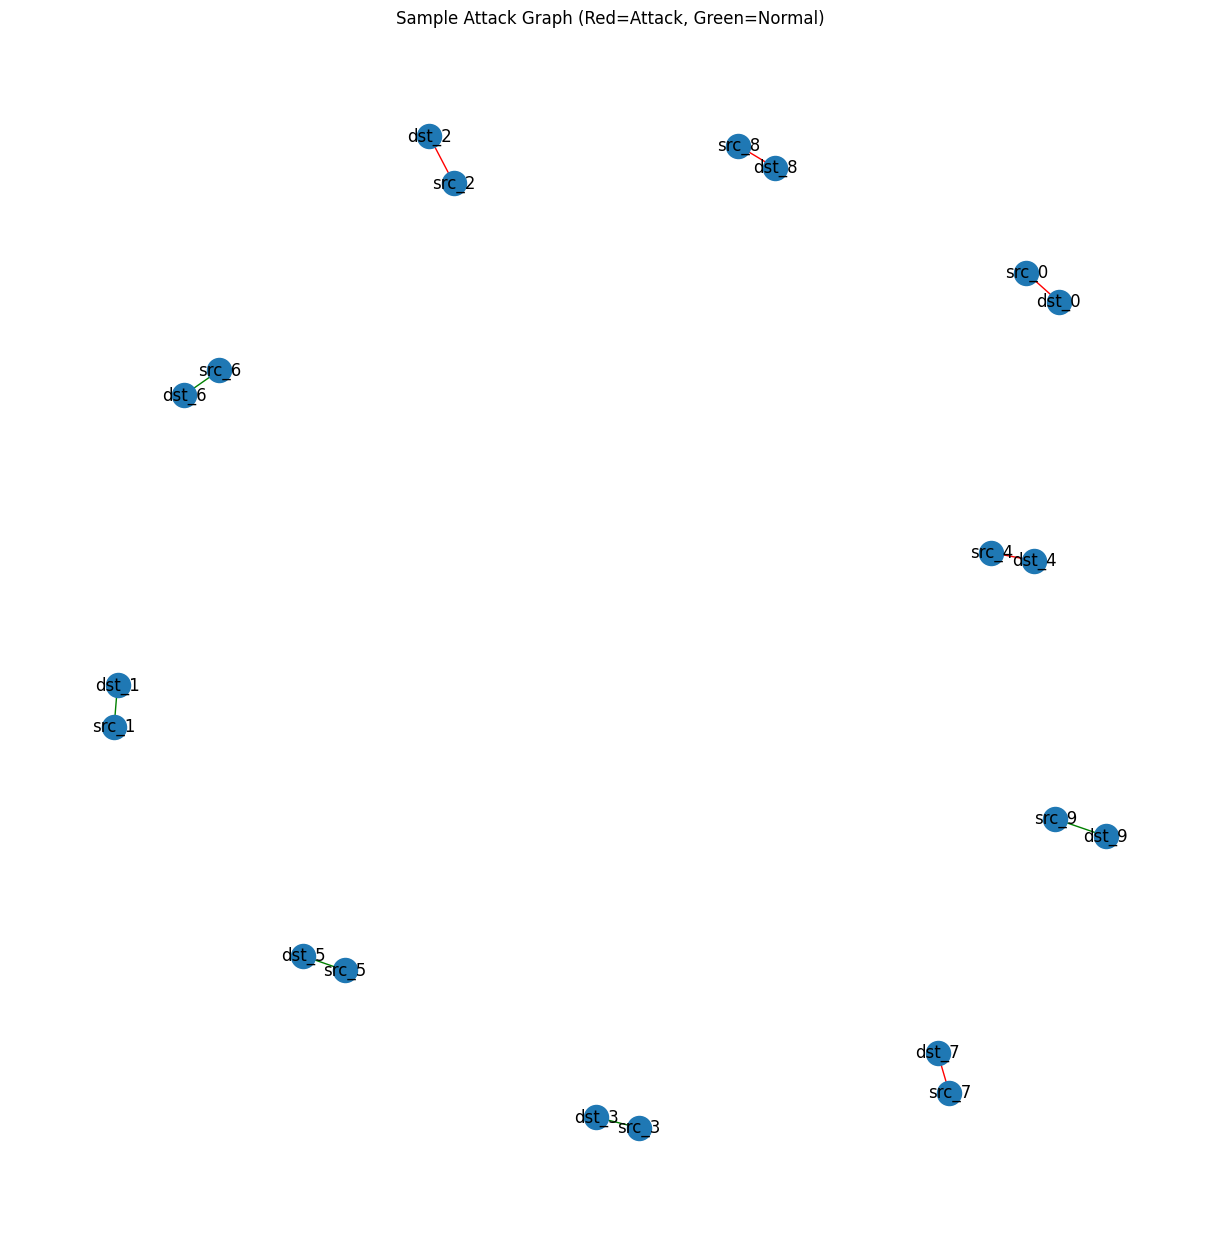

In [ ]:
import matplotlib.pyplot as plt
H = nx.Graph()
H.add_edges_from(list(G.edges(data=True))[:10])

edge_colors = ['red' if d['label']==1 else 'green' for u,v,d in H.edges(data=True)]
pos = nx.spring_layout(H, seed=42)

plt.figure(figsize=(12,12))
nx.draw(H, pos, with_labels=True, node_size=300, edge_color=edge_colors)
plt.title("Sample Attack Graph (Red=Attack, Green=Normal)")
plt.show()

In [ ]:
df

,dur,spkts,dpkts,sbytes,dbytes,attack_cat,orig_attack_cat,label
0,7.416666e-07,0.000000,0.000003,0.000000,0.000000e+00,0,0,0
1,5.833333e-07,0.000000,0.000003,0.000000,0.000000e+00,0,0,0
2,9.864799e-01,0.000100,0.000072,0.000236,7.393360e-06,0,0,0
3,2.199532e-01,0.000036,0.000034,0.000038,4.424421e-07,0,0,0
4,6.325824e-02,0.000050,0.000031,0.000149,9.314169e-06,0,0,0
...,...,...,...,...,...,...,...,...
2913070,3.308333e-06,0.000005,0.000007,0.000007,2.990298e-07,0,0,0
2913071,6.943741e-01,0.000032,0.000024,0.000055,1.769005e-05,1,1,1
2913072,2.916666e-07,0.000055,0.000000,0.000050,0.000000e+00,0,0,0
2913073,1.342392e-03,0.000014,0.000007,0.000010,3.386970e-07,0,0,0


In [ ]:
import torch
from torch_geometric.data import Data
import numpy as np

# --- 1. Map nodes to integer IDs ---
node_mapping = {node: i for i, node in enumerate(G.nodes())}
num_nodes = len(node_mapping)

# --- 2. Extract edges and their attributes efficiently ---
edge_u, edge_v, edge_features, edge_labels = [], [], [], []

for i, (u, v, attr) in enumerate(G.edges(data=True)):
    edge_u.append(node_mapping[u])
    edge_v.append(node_mapping[v])
    edge_features.append(np.array(attr["features"], dtype=np.float32))
    edge_labels.append(int(attr["label"]))

edge_u = np.array(edge_u)
edge_v = np.array(edge_v)
edges = np.vstack([edge_u, edge_v])

# --- 3. Convert to torch tensors ---
edge_index = torch.tensor(edges, dtype=torch.long)
edge_features = torch.tensor(np.stack(edge_features), dtype=torch.float)
edge_labels = torch.tensor(edge_labels, dtype=torch.long)

# --- 4. Build node features ---
node_features = torch.zeros((num_nodes, edge_features.shape[1]))
for i in range(edge_index.shape[1]):
    u, v = edge_index[:, i]
    node_features[u] += edge_features[i]
    node_features[v] += edge_features[i]

# Normalize node features
norm = node_features.norm(dim=1, keepdim=True)
node_features = node_features / (norm + 1e-8)

# --- 5. Build Data object ---
data = Data(
    x=node_features,
    edge_index=edge_index,
    edge_attr=edge_features,
    y=edge_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)

print("✅ PyG Data ready:", data)

✅ PyG Data ready: Data(x=[200000, 5], edge_index=[2, 100000], edge_attr=[100000, 5], y=[100000])


In [ ]:
import torch.nn as nn

# Compute class weights
counts = torch.bincount(edge_labels)
weights = torch.tensor([1.0 / counts[0], 1.0 / counts[1]], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv

class EdgeGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()

        # MLPs for edge features
        nn1 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels * hidden_channels)
        )
        self.conv1 = NNConv(in_channels, hidden_channels, nn1, aggr='mean')

        nn2 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        self.conv2 = NNConv(hidden_channels, hidden_channels, nn2, aggr='mean')

        nn3 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        self.conv3 = NNConv(hidden_channels, hidden_channels, nn3, aggr='mean')

        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = F.relu(self.conv1(x, edge_index, edge_attr))
        x = F.relu(self.conv2(x, edge_index, edge_attr))
        x = F.relu(self.conv3(x, edge_index, edge_attr))
        x = self.lin(x)
        return x[edge_index[0]]

In [ ]:
import torch.optim as optim
import torch.nn as nn # Import nn for CrossEntropyLoss

# Compute class weights based on the undersampled data
counts = torch.bincount(data.y)
# No need for explicit weights if data is balanced, but keep for consistency if desired
# weights = torch.tensor([1.0 / counts[0], 1.0 / counts[1]], dtype=torch.float).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights) # Use the updated criterion
criterion = nn.CrossEntropyLoss() # Use standard CrossEntropyLoss for balanced data


model = EdgeGNN(in_channels=edge_features.shape[1], hidden_channels=64, out_channels=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005) # Using the learning rate that worked best before
epochs = 300 # Using the number of epochs that worked best before

print(f"Training with learning rate: {optimizer.defaults['lr']} and epochs: {epochs}")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    # Calculate accuracy after each epoch
    model.eval()
    with torch.no_grad():
        preds = out.argmax(dim=1)
        acc = (preds == data.y).sum().item() / data.y.size(0)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Training with learning rate: 0.0005 and epochs: 300
Epoch 1/300, Loss: 0.6924, Accuracy: 0.5960
Epoch 2/300, Loss: 0.6916, Accuracy: 0.5946
Epoch 3/300, Loss: 0.6910, Accuracy: 0.5952
Epoch 4/300, Loss: 0.6904, Accuracy: 0.5935
Epoch 5/300, Loss: 0.6899, Accuracy: 0.5894
Epoch 6/300, Loss: 0.6893, Accuracy: 0.5893
Epoch 7/300, Loss: 0.6887, Accuracy: 0.5891
Epoch 8/300, Loss: 0.6881, Accuracy: 0.6144
Epoch 9/300, Loss: 0.6876, Accuracy: 0.6135
Epoch 10/300, Loss: 0.6870, Accuracy: 0.6131
Epoch 11/300, Loss: 0.6865, Accuracy: 0.6128
Epoch 12/300, Loss: 0.6859, Accuracy: 0.6125
Epoch 13/300, Loss: 0.6853, Accuracy: 0.6125
Epoch 14/300, Loss: 0.6847, Accuracy: 0.6124
Epoch 15/300, Loss: 0.6841, Accuracy: 0.6121
Epoch 16/300, Loss: 0.6835, Accuracy: 0.6115
Epoch 17/300, Loss: 0.6828, Accuracy: 0.6113
Epoch 18/300, Loss: 0.6822, Accuracy: 0.6113
Epoch 19/300, Loss: 0.6815, Accuracy: 0.6112
Epoch 20/300, Loss: 0.6808, Accuracy: 0.6112
Epoch 21/300, Loss: 0.6800, Accuracy: 0.6113
Epoch 22/300

In [ ]:
from sklearn.metrics import classification_report

model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_attr)
    probs = torch.softmax(out, dim=1)[:, 1]
    preds = (probs > 0.5).long().cpu().numpy()
    true = data.y.cpu().numpy()

print(classification_report(true, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.65      0.77     50046
           1       0.73      0.95      0.83     49954

    accuracy                           0.80    100000
   macro avg       0.83      0.80      0.80    100000
weighted avg       0.83      0.80      0.80    100000



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv, BatchNorm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# ============================================================
# ✅ Normalize numeric features before creating Data
# ============================================================
edge_attr_np = data.edge_attr.cpu().numpy()
scaler = StandardScaler()
edge_attr_np = scaler.fit_transform(edge_attr_np)
data.edge_attr = torch.tensor(edge_attr_np, dtype=torch.float, device=data.edge_attr.device)

x_np = data.x.cpu().numpy()
x_np = scaler.fit_transform(x_np)
data.x = torch.tensor(x_np, dtype=torch.float, device=data.x.device)


# ============================================================
# ✅ Stable EdgeGNN
# ============================================================
class EdgeGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.3):
        super().__init__()
        self.nn1 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels * hidden_channels)
        )
        self.conv1 = NNConv(in_channels, hidden_channels, self.nn1, aggr='mean')
        self.bn1 = BatchNorm(hidden_channels)
        self.drop1 = nn.Dropout(dropout)

        self.nn2 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        self.conv2 = NNConv(hidden_channels, hidden_channels, self.nn2, aggr='mean')
        self.bn2 = BatchNorm(hidden_channels)
        self.drop2 = nn.Dropout(dropout)

        self.lin1 = nn.Linear(hidden_channels, hidden_channels // 2)
        self.lin2 = nn.Linear(hidden_channels // 2, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index, edge_attr)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.drop1(x)

        x = self.conv2(x, edge_index, edge_attr)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.drop2(x)

        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        return x[edge_index[0]]


# ============================================================
# ✅ Training Function (stable, no NaN)
# ============================================================
def train_and_evaluate(data, lr=1e-4, epochs=300, batch_size=20000):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = EdgeGNN(
        in_channels=data.edge_attr.shape[1],
        hidden_channels=64,
        out_channels=2,
        dropout=0.25
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()

    num_edges = data.edge_index.shape[1]
    best_acc = 0.0
    print(f"Training with lr={lr}, epochs={epochs} on {device}\n")

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad(set_to_none=True)
        total_loss = 0.0

        for start in range(0, num_edges, batch_size):
            end = min(start + batch_size, num_edges)
            edge_index_batch = data.edge_index[:, start:end]
            edge_attr_batch = data.edge_attr[start:end]
            labels_batch = data.y[start:end]

            out = model(data.x, edge_index_batch, edge_attr_batch)
            if torch.isnan(out).any():
                print("⚠️ NaN detected in output. Skipping batch.")
                continue

            loss = criterion(out, labels_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            optimizer.zero_grad(set_to_none=True)

            total_loss += loss.item() * (end - start)

        # Evaluation
        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index, data.edge_attr)
            preds = out.argmax(dim=1)
            acc = (preds == data.y).float().mean().item()

        if acc > best_acc:
            best_acc = acc

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] | Loss: {total_loss/num_edges:.4f} | Acc: {acc:.4f}")

        torch.cuda.empty_cache()

    print(f"\n✅ Training completed! Best Accuracy: {best_acc:.4f}\n")
    print(classification_report(data.y.cpu().numpy(), preds.cpu().numpy()))


# ============================================================
# ✅ Run Training
# ============================================================
train_and_evaluate(data)

Training with lr=0.0001, epochs=300 on cuda

Epoch [10/300] | Loss: 0.6749 | Acc: 0.6196
Epoch [20/300] | Loss: 0.6403 | Acc: 0.6567
Epoch [30/300] | Loss: 0.6097 | Acc: 0.6529
Epoch [40/300] | Loss: 0.5899 | Acc: 0.6603
Epoch [50/300] | Loss: 0.5783 | Acc: 0.6612
Epoch [60/300] | Loss: 0.5692 | Acc: 0.6637
Epoch [70/300] | Loss: 0.5630 | Acc: 0.6663
Epoch [80/300] | Loss: 0.5566 | Acc: 0.6689
Epoch [90/300] | Loss: 0.5501 | Acc: 0.6715
Epoch [100/300] | Loss: 0.5430 | Acc: 0.6750
Epoch [110/300] | Loss: 0.5356 | Acc: 0.6788
Epoch [120/300] | Loss: 0.5274 | Acc: 0.6845
Epoch [130/300] | Loss: 0.5193 | Acc: 0.6928
Epoch [140/300] | Loss: 0.5100 | Acc: 0.8398
Epoch [150/300] | Loss: 0.5016 | Acc: 0.8374
Epoch [160/300] | Loss: 0.4938 | Acc: 0.8358
Epoch [170/300] | Loss: 0.4870 | Acc: 0.8249
Epoch [180/300] | Loss: 0.4808 | Acc: 0.8235
Epoch [190/300] | Loss: 0.4754 | Acc: 0.8179
Epoch [200/300] | Loss: 0.4724 | Acc: 0.8139
Epoch [210/300] | Loss: 0.4669 | Acc: 0.8138
Epoch [220/300] | L

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ============================================================
# 🔁 Step 1: Data Preparation
# ============================================================
df_sample = df.sample(n=200000, random_state=42).reset_index(drop=True)

X = df_sample.drop(columns=['attack_cat', 'orig_attack_cat', 'label'])
y = df_sample['label']

# RobustScaler is better for outlier-heavy data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# ============================================================
# 🔍 Step 2: Try multiple contamination values
# ============================================================
from sklearn.ensemble import IsolationForest

best_f1 = 0
best_contamination = None

for contamination in [0.01, 0.03, 0.05, 0.08, 0.1]:
    print(f"\n🚀 Training Isolation Forest (contamination={contamination})")

    iso_forest = IsolationForest(
        n_estimators=300,
        contamination=contamination,
        random_state=42,
        n_jobs=-1
    )
    iso_forest.fit(X_train)

    y_pred = iso_forest.predict(X_test)
    y_pred = np.where(y_pred == -1, 1, 0)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f} | F1 (Attack): {f1:.4f}")
    print(confusion_matrix(y_test, y_pred))

    if f1 > best_f1:
        best_f1 = f1
        best_contamination = contamination

print(f"\n✅ Best contamination: {best_contamination}, Best F1: {best_f1:.4f}")


🚀 Training Isolation Forest (contamination=0.01)
Accuracy: 0.7894 | F1 (Attack): 0.0351
[[47137   385]
 [12248   230]]

🚀 Training Isolation Forest (contamination=0.03)
Accuracy: 0.7826 | F1 (Attack): 0.0850
[[46353  1169]
 [11872   606]]

🚀 Training Isolation Forest (contamination=0.05)
Accuracy: 0.7749 | F1 (Attack): 0.1238
[[45540  1982]
 [11524   954]]

🚀 Training Isolation Forest (contamination=0.08)
Accuracy: 0.7475 | F1 (Attack): 0.1201
[[43817  3705]
 [11444  1034]]

🚀 Training Isolation Forest (contamination=0.1)
Accuracy: 0.7286 | F1 (Attack): 0.1178
[[42629  4893]
 [11391  1087]]

✅ Best contamination: 0.05, Best F1: 0.1238
